In [1]:
# Segmentation
import numpy as np

import mxnet as mx
from mxnet import image as mimage
from mxnet.gluon.data.vision import transforms

import gluoncv
from gluoncv.utils.viz import get_color_pallete
from gluoncv.data.transforms.presets.segmentation import test_transform

from matplotlib import pyplot as plt
import matplotlib.image as mpimg

import PIL.Image as pil

# using cpu
ctx = mx.cpu(0)

c:\Users\Kim\anaconda3\envs\pipeline1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Kim\anaconda3\envs\pipeline1\lib\site-packages\gluoncv\__init__.py:40: UserWarning: Both `mxnet==1.7.0` and `torch==1.6.0+cpu` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [6]:
filename = '../images/inputs/rooms/real/sofa.png'

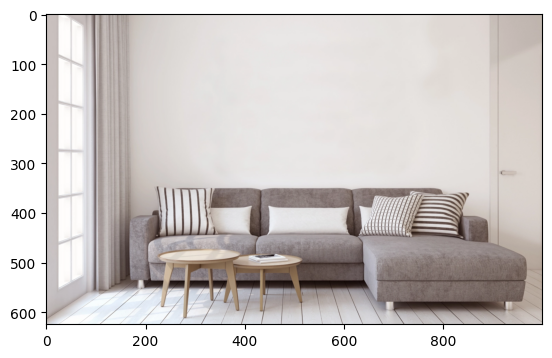

In [7]:
img = mimage.imread(filename)
plt.imshow(img.asnumpy())
plt.show()

In [8]:
img_t = test_transform(img, ctx)
img_t.shape

(1, 3, 625, 1000)

In [9]:
fcn_resnet50_ade = gluoncv.model_zoo.get_fcn_resnet50_ade(pretrained=True)
fcn_resnet101_ade = gluoncv.model_zoo.get_fcn_resnet101_ade(pretrained=True)
psp_resnet50_ade = gluoncv.model_zoo.get_psp_resnet50_ade(pretrained=True)
psp_resnet101_ade = gluoncv.model_zoo.get_psp_resnet101_ade(pretrained=True)
deeplab_resnet50_ade = gluoncv.model_zoo.get_deeplab_resnet50_ade(pretrained=True)
deeplab_resnet101_ade = gluoncv.model_zoo.get_deeplab_resnet101_ade(pretrained=True)

self.crop_size 480
self.crop_size 480


In [5]:
import os

deeplab_resnet101_ade = gluoncv.model_zoo.get_deeplab_resnet101_ade(pretrained=True)

# Loop over all images in input folder
folder_dir = "C:/Users/Kim/Documents/Bath/Dissertation/Code/images/inputs/rooms/real"

for image in os.listdir(folder_dir):
    filename = "../images/inputs/rooms/real/" + image
    img = mimage.imread(filename)
    img_t = test_transform(img, ctx)
    output = deeplab_resnet101_ade.predict(img_t)
    predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
    mask = get_color_pallete(predict, 'ade20k')
    mask.save('../images/outputs/final-outputs/seg/deeplab_resnet101_ade/' + image + '.png')

In [7]:
import os

psp_resnet101_ade = gluoncv.model_zoo.get_psp_resnet101_ade(pretrained=True)

# Loop over all images in input folder
folder_dir = "C:/Users/Kim/Documents/Bath/Dissertation/Code/images/inputs/rooms/real"

for image in os.listdir(folder_dir):
    filename = "../images/inputs/rooms/real/" + image
    img = mimage.imread(filename)
    img_t = test_transform(img, ctx)
    output = psp_resnet101_ade.predict(img_t)
    predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
    mask = get_color_pallete(predict, 'ade20k')
    mask.save('../images/outputs/final-outputs/seg/psp_resnet101_ade/' + image + '.png')

self.crop_size 480


In [12]:
output = fcn_resnet50_ade.predict(img_t)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
mask = get_color_pallete(predict, 'ade20k')
mask.save('../images/outputs/final-outputs/seg/sofa/fcn_resnet50_ade.png')

output = fcn_resnet101_ade.predict(img_t)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
mask = get_color_pallete(predict, 'ade20k')
mask.save('../images/outputs/final-outputs/seg/sofa/fcn_resnet101_ade.png')

output = psp_resnet50_ade.predict(img_t)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
mask = get_color_pallete(predict, 'ade20k')
mask.save('../images/outputs/final-outputs/seg/sofa/psp_resnet50_ade.png')

output = psp_resnet101_ade.predict(img_t)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
mask = get_color_pallete(predict, 'ade20k')
mask.save('../images/outputs/final-outputs/seg/sofa/psp_resnet101_ade.png')

output = deeplab_resnet50_ade.predict(img_t)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
mask = get_color_pallete(predict, 'ade20k')
mask.save('../images/outputs/final-outputs/seg/sofa/deeplab_resnet50_ade.png')

output = deeplab_resnet101_ade.predict(img_t)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
mask = get_color_pallete(predict, 'ade20k')
mask.save('../images/outputs/final-outputs/seg/sofa/deeplab_resnet101_ade.png')